# Analysing automatic concept mapping using fuzzy, USAGI and medcat

## Define Base Directory

In [1]:
baseDir = '/superbugai-data/yash/temp'

In [2]:
# ENABLE ONLY IF YOU WANT TO VIEW ALL THE DATA ROWS
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## Read the files

In [3]:
import pandas as pd

baseDir = '/superbugai-data/yash/temp'

conceptsDf = pd.read_csv(baseDir + '/' + 'concept_names.txt', sep='\t')
mappedConceptsFuzzyDf = pd.read_csv(baseDir + '/' + 'mapped_concept_names_fuzzy_1.csv')
mappedConceptsMedcatDf = pd.read_csv(baseDir + '/' + 'mapped_concept_names_medcat_snomed.csv')
mappedConceptsUsagiDf = pd.read_csv(baseDir + '/' + 'mapped_concept_names_usagi.csv')

## Read SNOMED vocabulary file

In [5]:
import pandas as pd

snomedDf = pd.read_csv(baseDir + '/' + 'preprocessed_snomed.csv')
snomedDf = snomedDf[snomedDf.name_status == 'P']
snomedDf

,cui,name,name_status,ontologies,description_type_ids,type_ids
0,10000006,Radiating chest pain (finding),P,SNOMED-CT,finding,67667581
1,1000001000168107,"Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet, ...",P,SNOMED-CT,containered trade product pack,19443049
2,100001000032107,Mass of left side of middle abdomen (finding),P,SNOMED-CT,finding,67667581
3,1000011000168105,Pantoprazole Heartburn Relief (Apohealth) (pan...,P,SNOMED-CT,NaN,72706784
4,1000021000168103,Pantoprazole Heartburn Relief (Apohealth) (pan...,P,SNOMED-CT,trade product pack,44751718
...,...,...,...,...,...,...
507707,999951000168105,Moxifloxacin (Apo) (moxifloxacin 400 mg) table...,P,SNOMED-CT,trade product pack,44751718
507708,999961000168107,Moxifloxacin (Apo) (moxifloxacin 400 mg) table...,P,SNOMED-CT,containered trade product pack,19443049
507709,999971000168101,Pantoprazole Heartburn Relief (Apohealth) (tra...,P,SNOMED-CT,trade product,99637394
507710,999981000168103,Rivaroxaban (Apo) (rivaroxaban 10 mg) tablet (...,P,SNOMED-CT,NaN,72706784


In [6]:
snomedDf['cui'] = snomedDf.cui.astype(str)

## Concepts Dataframe

In [7]:
conceptsDf

,concept_name,concept_code,source_concept_id,source_vocabulary_id,source_domain_id,source_concept_class_id,target_concept_id,relationship_id,reverese_relationship_id,concept_name_con,domain_id,vocab_id,concept_class_id,standard
0,Emergency Department,Emergency Department,2000001901,mimiciv_cs_place_of_service,Visit,Visit,8870,Maps to,Mapped from,Emergency Room - Hospital,Visit,CMS Place of Service,Visit,S
1,Medicine,Medicine,2000001902,mimiciv_cs_place_of_service,Visit,Visit,38004515,Maps to,Mapped from,Hospital,Visit,Medicare Specialty,Visit,S
2,Emergency Department Observation,Emergency Department Observation,2000001903,mimiciv_cs_place_of_service,Visit,Visit,8870,Maps to,Mapped from,Emergency Room - Hospital,Visit,CMS Place of Service,Visit,S
3,Nursery - Well Babies,Nursery - Well Babies,2000001904,mimiciv_cs_place_of_service,Visit,Visit,4160140,Maps to,Mapped from,Newborn nursery unit,Observation,SNOMED,Location,S
4,Medicine/Cardiology,Medicine/Cardiology,2000001905,mimiciv_cs_place_of_service,Visit,Visit,581383,Maps to,Mapped from,Inpatient Cardiac Care Facility,Visit,CMS Place of Service,Visit,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,NMED,NMED,2000001864,mimiciv_vis_service,Visit,Visit,4150070,Maps to,Mapped from,Neurology department,Observation,SNOMED,Location,S
3838,VSURG,VSURG,2000001865,mimiciv_vis_service,Visit,Visit,4150086,Maps to,Mapped from,Vascular surgery department,Observation,SNOMED,Location,S
3839,PSURG,PSURG,2000001866,mimiciv_vis_service,Visit,Visit,4150085,Maps to,Mapped from,Plastic surgery department,Observation,SNOMED,Location,S
3840,TSURG,TSURG,2000001867,mimiciv_vis_service,Observation,Location,4148989,Maps to,Mapped from,Thoracic surgery department,Observation,SNOMED,Location,S


In [9]:
conceptsDf.groupby(['source_vocabulary_id', 'vocab_id']).agg({'source_concept_id':'count'})


source_concept_id
source_vocabulary_id           vocab_id                               
mimiciv_cs_place_of_service    CMS Place of Service                  3
                               Medicare Specialty                    1
                               SNOMED                                1
mimiciv_drug_ndc               HCPCS                                 1
                               RxNorm                             1392
                               RxNorm Extension                      7
mimiciv_drug_route             SNOMED                               96
mimiciv_meas_chart             LOINC                               152
                               SNOMED                               15
mimiciv_meas_chartevents_value LOINC                                13
                               SNOMED                               16
mimiciv_meas_lab_loinc         LOINC                               251
mimiciv_meas_unit              SNOMED                                1
                               UCUM                                 53
mimiciv_meas_wf                LOINC                                43
                               SNOMED                                1
mimiciv_meas_wf_unit           UCUM                                  3
mimiciv_micro_antibiotic       LOINC                                29
mimiciv_micro_microtest        SNOMED                               34
mimiciv_micro_organism         RxNorm                                1
                               SNOMED                              363
mimiciv_micro_resistance       LOINC                                 4
mimiciv_micro_specimen         SNOMED                               85
mimiciv_mimic_generated        None                                 12
mimiciv_obs_drgcodes           LOINC                                 8
                               SNOMED                               14
mimiciv_obs_insurance          LOINC                                 5
mimiciv_obs_language           SNOMED                                1
mimiciv_obs_marital            LOINC                                 7
mimiciv_per_ethnicity          Ethnicity                             1
                               None                                  3
                               Race                                  4
mimiciv_proc_datetimeevents    None                                  9
                               SNOMED                              120
mimiciv_proc_itemid            SNOMED                              113
mimiciv_vis_admission_location CMS Place of Service                  5
                               LOINC                                 1
                               NUCC                                  2
                               SNOMED                               34
                               Visit                                 1
mimiciv_vis_admission_type     CMS Place of Service                  6
                               NUCC                                  1
                               Visit                                 2
mimiciv_vis_discharge_location CMS Place of Service                  5
                               LOINC                                 1
                               NUCC                                  3
                               SNOMED                                2
                               Visit                                 2
mimiciv_vis_service            SNOMED                               19

## Fuzzy mapping file

In [8]:
mappedConceptsFuzzyDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"[('Genetics department (environment)', 71, 230..."
1,2000001902,Medicine,mimiciv_cs_place_of_service,"[('Merodicein (substance)', 57, 197790)]"
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,[('Emergency department physician (occupation)...
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"[('Well nourished (finding)', 59, 172636)]"
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"[('Cardiology service (procedure)', 68, 230258)]"
...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"[('Verdin (organism)', 42, 90892)]"
3838,2000001865,VSURG,mimiciv_vis_service,"[('Causus (organism)', 40, 326208)]"
3839,2000001866,PSURG,mimiciv_vis_service,"[('Surgeon (occupation)', 43, 224480)]"
3840,2000001867,TSURG,mimiciv_vis_service,"[('Surgeon (occupation)', 43, 224480)]"


In [9]:
import ast

mappedConceptsFuzzyDf["Mapped Concept Fuzzy"] = mappedConceptsFuzzyDf["matching_concept"]\
                                            .apply(lambda matchingConceptString: ast.literal_eval(matchingConceptString))\
                                            .apply(lambda matchingConceptList: matchingConceptList[0][0])
mappedConceptsFuzzyDf["Mapped ID Fuzzy"] = mappedConceptsFuzzyDf["matching_concept"]\
                                            .apply(lambda matchingConceptString: ast.literal_eval(matchingConceptString))\
                                            .apply(lambda matchingConceptList: matchingConceptList[0][2])
mappedConceptsFuzzyDf["Mapped Score Fuzzy"] = mappedConceptsFuzzyDf["matching_concept"]\
                                            .apply(lambda matchingConceptString: ast.literal_eval(matchingConceptString))\
                                            .apply(lambda matchingConceptList: matchingConceptList[0][1])
mappedConceptsFuzzyDf = mappedConceptsFuzzyDf[mappedConceptsFuzzyDf['concept_name'].notna()]
mappedConceptsFuzzyDf.drop(columns=['matching_concept'], inplace=True)
mappedConceptsFuzzyDf

,concept_id,concept_name,concept_vocabulary_id,Mapped Concept Fuzzy,Mapped ID Fuzzy,Mapped Score Fuzzy
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,Genetics department (environment),230127,71
1,2000001902,Medicine,mimiciv_cs_place_of_service,Merodicein (substance),197790,57
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,Emergency department physician (occupation),229560,74
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,Well nourished (finding),172636,59
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,Cardiology service (procedure),230258,68
...,...,...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,Verdin (organism),90892,42
3838,2000001865,VSURG,mimiciv_vis_service,Causus (organism),326208,40
3839,2000001866,PSURG,mimiciv_vis_service,Surgeon (occupation),224480,43
3840,2000001867,TSURG,mimiciv_vis_service,Surgeon (occupation),224480,43


In [10]:
mappedConceptsFuzzyDf = pd.merge(mappedConceptsFuzzyDf, snomedDf.add_suffix(' Fuzzy'), left_on='Mapped Concept Fuzzy', right_on='name Fuzzy')
mappedConceptsFuzzyDf

,concept_id,concept_name,concept_vocabulary_id,Mapped Concept Fuzzy,Mapped ID Fuzzy,Mapped Score Fuzzy,cui Fuzzy,name Fuzzy,name_status Fuzzy,ontologies Fuzzy,description_type_ids Fuzzy,type_ids Fuzzy
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,Genetics department (environment),230127,71,309928004,Genetics department (environment),P,SNOMED-CT,environment,75168589
1,2000001902,Medicine,mimiciv_cs_place_of_service,Merodicein (substance),197790,57,27730007,Merodicein (substance),P,SNOMED-CT,substance,91187746
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,Emergency department physician (occupation),229560,74,309294001,Emergency department physician (occupation),P,SNOMED-CT,occupation,16939031
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,Well nourished (finding),172636,59,248324001,Well nourished (finding),P,SNOMED-CT,finding,67667581
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,Cardiology service (procedure),230258,68,310036006,Cardiology service (procedure),P,SNOMED-CT,procedure,28321150
...,...,...,...,...,...,...,...,...,...,...,...,...
3837,2000001865,VSURG,mimiciv_vis_service,Causus (organism),326208,40,45587005,Causus (organism),P,SNOMED-CT,organism,81102976
3838,2000001864,NMED,mimiciv_vis_service,Verdin (organism),90892,42,1465001,Verdin (organism),P,SNOMED-CT,organism,81102976
3839,2000001866,PSURG,mimiciv_vis_service,Surgeon (occupation),224480,43,304292004,Surgeon (occupation),P,SNOMED-CT,occupation,16939031
3840,2000001867,TSURG,mimiciv_vis_service,Surgeon (occupation),224480,43,304292004,Surgeon (occupation),P,SNOMED-CT,occupation,16939031


## Medcat mapping file

In [11]:
mappedConceptsMedcatDf = mappedConceptsMedcatDf[mappedConceptsMedcatDf['concept_name'].notna()]
mappedConceptsMedcatDf

,concept_id,concept_name,concept_vocabulary_id,matching_concept
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ..."
1,2000001902,Medicine,mimiciv_cs_place_of_service,"{'entities': {}, 'tokens': []}"
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Emergency', ..."
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Nursery', 'c..."
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,"{'entities': {0: {'pretty_name': 'Cardiology',..."
...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3838,2000001865,VSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3839,2000001866,PSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"
3840,2000001867,TSURG,mimiciv_vis_service,"{'entities': {}, 'tokens': []}"


In [12]:
import ast

cuis = []
conceptTypes = []
conceptPrettyNames = []
conceptSourceValues = []
contextSimilarityScores = []

for i, row in mappedConceptsMedcatDf.iterrows():
    entities = ast.literal_eval(row["matching_concept"])['entities']
    cui = None
    conceptType = None
    conceptPrettyName = None
    conceptSourceValue = None
    maxContextSimilarityScore = 0
    for key in entities.keys():
        entity = entities[key]
        contextSimilarityScore = float(entity['context_similarity'])
        if contextSimilarityScore > maxContextSimilarityScore:
            cui = entity['cui']
            conceptType = entity['type_ids']
            conceptPrettyName = entity['pretty_name']
            conceptSourceValue = entity['source_value']
            maxContextSimilarityScore = contextSimilarityScore
    cuis.append(cui)
    conceptTypes.append(conceptType)
    conceptSourceValues.append(conceptSourceValue)
    conceptPrettyNames.append(conceptPrettyName)
    contextSimilarityScores.append(maxContextSimilarityScore)

mappedConceptsMedcatDf['Mapped Concept Pretty Name Medcat'] = conceptPrettyNames
mappedConceptsMedcatDf['Mapped Concept Source Value Medcat'] = conceptSourceValues
mappedConceptsMedcatDf['Mapped ID Medcat'] = cuis
mappedConceptsMedcatDf['Mapped Concept Type'] = conceptTypes
mappedConceptsMedcatDf['Mapped Score Medcat'] = contextSimilarityScores
mappedConceptsMedcatDf.drop(columns=['matching_concept'], inplace=True)
mappedConceptsMedcatDf

,concept_id,concept_name,concept_vocabulary_id,Mapped Concept Pretty Name Medcat,Mapped Concept Source Value Medcat,Mapped ID Medcat,Mapped Concept Type,Mapped Score Medcat
0,2000001901,Emergency Department,mimiciv_cs_place_of_service,Emergency,Emergency,25876001,[7882689],1.0
1,2000001902,Medicine,mimiciv_cs_place_of_service,None,None,None,None,0.0
2,2000001903,Emergency Department Observation,mimiciv_cs_place_of_service,Emergency,Emergency,25876001,[7882689],1.0
3,2000001904,Nursery - Well Babies,mimiciv_cs_place_of_service,Nursery,Nursery,161117005,[67667581],1.0
4,2000001905,Medicine/Cardiology,mimiciv_cs_place_of_service,Cardiology,Cardiology,394579002,[7882689],1.0
...,...,...,...,...,...,...,...,...
3837,2000001864,NMED,mimiciv_vis_service,None,None,None,None,0.0
3838,2000001865,VSURG,mimiciv_vis_service,None,None,None,None,0.0
3839,2000001866,PSURG,mimiciv_vis_service,None,None,None,None,0.0
3840,2000001867,TSURG,mimiciv_vis_service,None,None,None,None,0.0


## Usagi File

In [13]:
mappedConceptsUsagiDf
mappedConceptsUsagiDf.rename(columns={'targetConceptName': 'Mapped Concept Usagi', 'targetConceptId': 'Mapped ID Usagi', 'matchScore': 'Mapped Score Usagi'}, inplace=True)
mappedConceptsUsagiDf

,sourceCode,sourceName,sourceFrequency,sourceAutoAssignedConceptIds,Mapped Score Usagi,mappingStatus,Mapped ID Usagi,Mapped Concept Usagi,targetVocabularyId,targetDomainId,targetStandardConcept,targetChildCount,targetParentCount,targetConceptClassId,targetConceptCode,targetValidStartDate,targetValidEndDate,targetInvalidReason
0,70012,BLOOD CULTURE,-1,NaN,1.000000,UNCHECKED,37392838,Blood culture,SNOMED,Measurement,S,0,1,Observable Entity,1009211000000104,20160401.0,20991231.0,NaN
1,TRAUMATIC INJURY W/O MCC,TRAUMATIC INJURY W/O MCC,-1,NaN,1.000000,UNCHECKED,38001589,Traumatic injury w/o MCC,DRG,Observation,S,0,1,MS-DRG,914,20071001.0,20991231.0,NaN
2,70013,FLUID RECEIVED IN BLOOD CULTURE BOTTLES,-1,NaN,0.628521,UNCHECKED,35624569,Aerobic blood culture bottle,SNOMED,Device,S,0,1,Physical Object,767385003,20180731.0,20991231.0,NaN
3,Pulmicort Turbuhaler 200 mcg,Budesonide 0.2 MG/ACTUAT [Pulmicort Turbuhaler],-1,NaN,1.000000,UNCHECKED,42958532,Budesonide 0.2 MG/ACTUAT [Pulmicort Turbuhaler],RxNorm Extension,Drug,S,5,0,Branded Drug Comp,OMOP4685041,20180821.0,20991231.0,NaN
4,OTHER MUSCULOSKELETAL SYS & CONNECTIVE TISSUE ...,OTHER MUSCULOSKELETAL SYS & CONNECTIVE TISSUE ...,-1,NaN,1.000000,UNCHECKED,38001340,Other musculoskeletal sys & connective tissue ...,DRG,Observation,S,0,1,MS-DRG,566,20071001.0,20991231.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,Xenaderm ea,Castor Oil / Peruvian balsam / TRYPSIN Topical...,-1,NaN,1.000000,UNCHECKED,40125480,castor oil / Peruvian balsam / trypsin Topical...,RxNorm,Drug,S,1,8,Branded Drug Form,581756,20051113.0,20991231.0,NaN
3838,Isradipine 15mg,Isradipine,-1,NaN,1.000000,UNCHECKED,1326012,isradipine,RxNorm,Drug,S,34,1,Ingredient,33910,19700101.0,20991231.0,NaN
3839,Zestoretic Zestoretic,Hydrochlorothiazide / Lisinopril Oral Tablet [...,-1,NaN,1.000000,UNCHECKED,40155308,hydrochlorothiazide / lisinopril Oral Tablet [...,RxNorm,Drug,S,3,11,Branded Drug Form,823970,20081130.0,20991231.0,NaN
3840,Symbicort 160/4.5,60 ACTUAT Budesonide 0.16 MG/ACTUAT / formoter...,-1,NaN,1.000000,UNCHECKED,42708517,60 ACTUAT budesonide 0.16 MG/ACTUAT / formoter...,RxNorm,Drug,S,0,9,Quant Branded Drug,1246317,20120507.0,20991231.0,NaN


## Combine all the files

In [14]:
finalDf = conceptsDf\
    .merge(mappedConceptsFuzzyDf, left_on='source_concept_id', right_on='concept_id', how='left')\
        .merge(mappedConceptsMedcatDf, left_on='source_concept_id', right_on='concept_id', how='left')\
            .merge(mappedConceptsUsagiDf, left_on=['concept_code', 'concept_name_x'], right_on=['sourceCode', 'sourceName'], how='left')

finalDf = finalDf.iloc[finalDf.astype(str).drop_duplicates().index].reset_index()
finalDf

,index,concept_name_x,concept_code,source_concept_id,source_vocabulary_id,source_domain_id,source_concept_class_id,target_concept_id,relationship_id,reverese_relationship_id,...,targetVocabularyId,targetDomainId,targetStandardConcept,targetChildCount,targetParentCount,targetConceptClassId,targetConceptCode,targetValidStartDate,targetValidEndDate,targetInvalidReason
0,0,Emergency Department,Emergency Department,2000001901,mimiciv_cs_place_of_service,Visit,Visit,8870,Maps to,Mapped from,...,LOINC,Meas Value,S,0,0,Answer,LA10268-3,19700101.0,20991231.0,NaN
1,1,Medicine,Medicine,2000001902,mimiciv_cs_place_of_service,Visit,Visit,38004515,Maps to,Mapped from,...,SNOMED,Observation,S,0,1,Qualifier Value,718891000000103,20101001.0,20991231.0,NaN
2,2,Emergency Department Observation,Emergency Department Observation,2000001903,mimiciv_cs_place_of_service,Visit,Visit,8870,Maps to,Mapped from,...,LOINC,Meas Value,S,0,0,Answer,LA10268-3,19700101.0,20991231.0,NaN
3,3,Nursery - Well Babies,Nursery - Well Babies,2000001904,mimiciv_cs_place_of_service,Visit,Visit,4160140,Maps to,Mapped from,...,LOINC,Meas Value,S,0,0,Answer,LA10187-5,19700101.0,20991231.0,NaN
4,4,Medicine/Cardiology,Medicine/Cardiology,2000001905,mimiciv_cs_place_of_service,Visit,Visit,581383,Maps to,Mapped from,...,SNOMED,Observation,S,1,1,Qualifier Value,394579002,20030131.0,20991231.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,3883,NMED,NMED,2000001864,mimiciv_vis_service,Visit,Visit,4150070,Maps to,Mapped from,...,OSM,Geography,S,0,1,10th level,1022355,19700101.0,20991231.0,NaN
3838,3884,VSURG,VSURG,2000001865,mimiciv_vis_service,Visit,Visit,4150086,Maps to,Mapped from,...,SNOMED,Observation,S,0,2,Organism,133458005,20020131.0,20991231.0,NaN
3839,3885,PSURG,PSURG,2000001866,mimiciv_vis_service,Visit,Visit,4150085,Maps to,Mapped from,...,SNOMED,Observation,S,0,1,Qualifier Value,83578000,20020131.0,20991231.0,NaN
3840,3886,TSURG,TSURG,2000001867,mimiciv_vis_service,Observation,Location,4148989,Maps to,Mapped from,...,OSM,Geography,S,0,1,7th level,4538734,19700101.0,20991231.0,NaN


In [15]:
# # ENABLE ONLY IF YOU WANT TO CREATE A FILE
# import csv

# finalDf[finalDf.vocab_id == 'SNOMED']\
#     [['concept_name', 'source_concept_id', 'target_concept_id', 'concept_name_con', 'Mapped Concept Fuzzy', 'Mapped ID Fuzzy', 'Mapped Score Fuzzy', 'Mapped Concept Pretty Name Medcat', 'Mapped Concept Source Value Medcat', 'Mapped ID Medcat', 'Mapped Score Medcat']]\
#     .to_csv(baseDir + '/snomed_mappings.csv', index=False, quoting=csv.QUOTE_ALL)

In [22]:
# ENABLE ONLY IF YOU WANT TO CREATE A FILE
import csv

finalDf[finalDf.source_vocabulary_id == 'mimiciv_drug_ndc']\
    [['concept_name', 'concept_code', 'target_concept_id', 'concept_name_con', 'Mapped Concept Fuzzy', 'Mapped ID Fuzzy', 'Mapped Score Fuzzy', 'Mapped Concept Usagi', 'Mapped ID Usagi', 'Mapped Score Usagi', 'Mapped Concept Pretty Name Medcat', 'Mapped Concept Source Value Medcat', 'Mapped ID Medcat', 'Mapped Score Medcat']]\
        .to_csv(baseDir + '/drugs_mappings.csv', index=False, quoting=csv.QUOTE_ALL, sep='|') # .head()        

In [15]:
finalDf[['concept_name', 'target_concept_id', 'concept_name_con', 'Mapped Concept Fuzzy', 'Mapped ID Fuzzy', 'Mapped Concept Usagi', 'Mapped ID Usagi', 'Mapped Concept Pretty Name Medcat', 'Mapped Concept Source Value Medcat', 'Mapped ID Medcat']]

,concept_name,target_concept_id,concept_name_con,Mapped Concept Fuzzy,Mapped ID Fuzzy,Mapped Concept Usagi,Mapped ID Usagi,Mapped Concept Pretty Name Medcat,Mapped Concept Source Value Medcat,Mapped ID Medcat
0,Emergency Department,8870,Emergency Room - Hospital,Genetics department (environment),230127,Emergency Department,45879101,Emergency,Emergency,25876001
1,Medicine,38004515,Hospital,Merodicein (substance),197790,Medicine,44804056,None,None,None
2,Emergency Department Observation,8870,Emergency Room - Hospital,Emergency department physician (occupation),229560,Emergency Department,45879101,Emergency,Emergency,25876001
3,Nursery - Well Babies,4160140,Newborn nursery unit,Well nourished (finding),172636,Neonatal Well Baby Nursery Unit,45885276,Nursery,Nursery,161117005
4,Medicine/Cardiology,581383,Inpatient Cardiac Care Facility,Cardiology service (procedure),230258,Cardiology,4215120,Cardiology,Cardiology,394579002
...,...,...,...,...,...,...,...,...,...,...
3837,NMED,4150070,Neurology department,Verdin (organism),90892,Anmer,42035782,None,None,None
3838,VSURG,4150086,Vascular surgery department,Causus (organism),326208,Khevsurian cattle,4045385,None,None,None
3839,PSURG,4150085,Plastic surgery department,Surgeon (occupation),224480,Surgical,4307649,None,None,None
3840,TSURG,4148989,Thoracic surgery department,Surgeon (occupation),224480,Tsu,42007235,None,None,None


## Exploration of the mappings

### Mapping Types for Fuzzy

In [17]:
finalDf\
    .groupby('source_vocabulary_id')\
        .agg(
                {
                    'concept_name':'count',
                    'description_type_ids Fuzzy': 'unique',
                }
            )\
                .reset_index()\
                    .rename(columns={'description_type_ids Fuzzy': 'Concept Types Fuzzy'})

,source_vocabulary_id,concept_name,Concept Types Fuzzy
0,mimiciv_cs_place_of_service,5,"[environment, substance, occupation, finding, procedure]"
1,mimiciv_drug_ndc,1400,"[substance, medicinal product pack, trade product pack, nan, finding, AU substance, trade product, medicinal product, procedure, organism, qualifier value, situation, geographic location, dose form, basic dose form, occupation, disorder, AU qualifier, event, clinical drug, containered trade product pack, environment, product, attribute, physical object, body structure, regime/therapy]"
2,mimiciv_drug_route,96,"[event, person, finding, organism, disorder, cell, substance, procedure, intended site, occupation, physical object, trade product, attribute]"
3,mimiciv_meas_chart,169,"[substance, event, procedure, disorder, observable entity, finding, attribute, environment, assessment scale, physical object, organism, occupation, role, trade product, physical force, qualifier value, person, situation, product, specimen, geographic location]"
4,mimiciv_meas_chartevents_value,29,"[finding, disorder, attribute, event, procedure]"
5,mimiciv_meas_lab_loinc,251,"[finding, procedure, disorder, product, substance, physical object, situation, attribute, observable entity, occupation, cell, qualifier value, morphologic abnormality, environment, navigational concept, trade product]"
6,mimiciv_meas_unit,54,"[finding, person, cell, event, organism, attribute, environment, qualifier value, substance, occupation, disorder]"
7,mimiciv_meas_wf,44,"[substance, trade product, person, occupation, qualifier value, finding, procedure, observable entity, attribute, disorder, product, event, morphologic abnormality]"
8,mimiciv_meas_wf_unit,3,"[occupation, finding, cell]"
9,mimiciv_micro_antibiotic,29,"[organism, substance]"


### Mapping Types for Medcat

In [18]:
finalDf['Mapped Concept Type'].apply(lambda x: None if x is None else len(x)).unique()

array([ 1., nan])

In [19]:
finalDf['Mapped Concept Type'] = finalDf['Mapped Concept Type'].apply(lambda x: None if x is None else x[0])

In [20]:
finalDf\
    .groupby('source_vocabulary_id')\
        .agg(
                {
                    'concept_name':'count',
                    'Mapped Concept Type': 'unique',
                }
            )\
                .reset_index()\
                    .rename(columns={'Mapped Concept Type': 'Concept Types Medcat'})

,source_vocabulary_id,concept_name,Concept Types Medcat
0,mimiciv_cs_place_of_service,5,"[7882689, None, 67667581]"
1,mimiciv_drug_ndc,1400,"[91187746, None, 21114934, 27603525, 99637394, 67667581, 32816260, 2680757, 37785117, 7882689, 81102976, 37552161, 26456867, 9090192, 47503797]"
2,mimiciv_drug_route,96,"[None, 37552161, 51120815, 28321150, 7882689, 91187746]"
3,mimiciv_meas_chart,169,"[2680757, None, 37552161, 28321150, 43039974, 7882689, 67667581, 32816260, 91187746, 3061879]"
4,mimiciv_meas_chartevents_value,29,"[67667581, 9090192, 7882689, None]"
5,mimiciv_meas_lab_loinc,251,"[7882689, 91187746, 2680757, 32816260, 9090192, 28321150, 31601201, None, 43857361, 99220404, 37552161, 66527446, 33782986, 81102976]"
6,mimiciv_meas_unit,54,"[None, 7882689]"
7,mimiciv_meas_wf,44,"[2680757, 7882689, None, 37552161, 91187746]"
8,mimiciv_meas_wf_unit,3,[7882689]
9,mimiciv_micro_antibiotic,29,"[91187746, None]"


### Mapping Types for Usagi

In [22]:
finalDf\
    .groupby('source_vocabulary_id')\
        .agg(
                {
                    'concept_name':'count',
                    'targetVocabularyId': 'unique',
                    'targetDomainId': 'unique',
                    'targetConceptClassId': 'unique',
                }
            )\
                .reset_index()\
                    .rename(columns={'targetVocabularyId': 'Vocabulary IDs Usagi', 'targetDomainId': 'Domain IDs Usagi', 'targetConceptClassId': 'Concept Classes Usagi'})

,source_vocabulary_id,concept_name,Vocabulary IDs Usagi,Domain IDs Usagi,Concept Classes Usagi
0,mimiciv_cs_place_of_service,5,"[LOINC, SNOMED]","[Meas Value, Observation]","[Answer, Qualifier Value]"
1,mimiciv_drug_ndc,1400,"[RxNorm, RxNorm Extension, LOINC, SNOMED, UK Biobank, dm+d, NDC, HCPCS]","[Drug, Meas Value, Device, Observation, Procedure]","[Branded Drug Comp, Branded Drug, Quant Clinical Drug, Clinical Drug Comp, Branded Drug Form, Ingredient, Quant Branded Drug, Clinical Drug, Answer, Substance, Clinical Drug Box, Clinical Drug Form, Branded Pack, Organism, Value, Qualifier Value, Branded Drug Box, VMPP, Device, AMP, HCPCS, Procedure, Physical Object]"
2,mimiciv_drug_route,96,"[LOINC, OSM, SNOMED, HemOnc, UK Biobank, OMOP Genomic, RxNorm Extension, Nebraska Lexicon, NAACCR, RxNorm]","[Meas Value, Geography, Measurement, Regimen, Observation, Device, Spec Anatomic Site, Route, Procedure, Drug, Condition]","[Answer, 8th level, Observable Entity, Regimen, Genetic Variation, Qualifier Value, Physical Object, Body Structure, 10th level, 7th level, Procedure, Ingredient, Clinical Finding, NAACCR Value, Branded Drug, Attribute, Value, Substance, Organism, Location]"
3,mimiciv_meas_chart,169,"[SNOMED, SNOMED Veterinary, LOINC, Medicare Specialty, ICD9Proc, OSM, RxNorm, OMOP Genomic, Nebraska Lexicon, UK Biobank, ICD10PCS, RxNorm Extension]","[Measurement, Condition, Provider, Observation, Procedure, Geography, Device, Meas Value, Drug]","[Observable Entity, Clinical Finding, Clinical Observation, Physician Specialty, Qualifier Value, 4-dig billing code, 11th level, Procedure, Physical Object, 10th level, Attribute, Answer, Lab Test, 8th level, Ingredient, Genetic Variation, Substance, Context-dependent, 7th level, Staging / Scales, 9th level, Value, ICD10PCS, Branded Drug Form]"
4,mimiciv_meas_chartevents_value,29,"[SNOMED, LOINC, UCUM]","[Condition, Meas Value, Procedure, Unit, Measurement]","[Clinical Finding, Answer, Procedure, Unit, Clinical Observation]"
5,mimiciv_meas_lab_loinc,251,"[SNOMED, NAACCR, NDC, LOINC, OMOP Genomic, RxNorm, Nebraska Lexicon, RxNorm Extension, Medicare Specialty, Cancer Modifier, SNOMED Veterinary]","[Measurement, Meas Value, Device, Observation, Condition, Drug, Provider, Spec Anatomic Site, Specimen]","[Observable Entity, Procedure, NAACCR Value, Device, Substance, Answer, Physical Object, Clinical Observation, Qualifier Value, Clinical Finding, Genetic Variation, Ingredient, Lab Test, Physician Specialty, Body Structure, Histopattern, Specimen, Morph Abnormality]"
6,mimiciv_meas_unit,54,"[SNOMED, OSM, LOINC, UK Biobank, OMOP Genomic, HemOnc, NAACCR, UCUM, RxNorm Extension, RxNorm, Cancer Modifier, HCPCS, nan]","[Measurement, Geography, Meas Value, Observation, Regimen, Procedure, Unit, Drug, nan]","[Procedure, 8th level, Answer, Genetic Variation, Regimen, NAACCR Value, Substance, Unit, 10th level, Clinical Observation, Qualifier Value, Clinical Drug Comp, Social Context, Clinical Drug, Histopattern, HCPCS, Value, nan, Attribute]"
7,mimiciv_meas_wf,44,"[SNOMED, LOINC, OMOP Genomic]","[Measurement, Observation]","[Observable Entity, Clinical Observation, Genetic Variation, Procedure, Substance]"
8,mimiciv_meas_wf_unit,3,"[UCUM, LOINC]","[Unit, Meas Value]","[Unit, Answer]"
9,mimiciv_micro_antibiotic,29,"[RxNorm, RxNorm Extension]",[Drug],"[Ingredient, Clinical Drug Form]"


## Quantifying mapping performance

### Counting matching IDs

In [23]:
sum(finalDf['target_concept_id'] == finalDf['Mapped ID Fuzzy'])

0

In [24]:
sum(finalDf['Mapped ID Fuzzy'] == finalDf['Mapped ID Usagi'])

0

In [25]:
sum(finalDf['Mapped ID Medcat'] == finalDf['Mapped ID Fuzzy'])

0

### Using `token sort ratio` (based on `Leivenshtein Distance`)

#### Matching Counts

In [27]:
mapped_counts_manual = finalDf.concept_name_con.notna().sum()
mapped_counts_fuzzy = finalDf['Mapped Concept Fuzzy'].notna().sum()
mapped_counts_usagi = finalDf['Mapped Concept Usagi'].notna().sum()
mapped_counts_pretty_name_medcat = finalDf['Mapped Concept Pretty Name Medcat'].notna().sum()
mapped_counts_source_value_medcat = finalDf['Mapped Concept Source Value Medcat'].notna().sum()

print('Mapped Count Manual: ', mapped_counts_manual)
print('Mapped Count Fuzzy: ', mapped_counts_fuzzy)
print('Mapped Count Usagi: ', mapped_counts_usagi)
print('Mapped Count Pretty Name Medcat: ', mapped_counts_pretty_name_medcat)
print('Mapped Count Source Value Medcat: ', mapped_counts_source_value_medcat)

Mapped Count Manual:  2946
Mapped Count Fuzzy:  3842
Mapped Count Usagi:  3842
Mapped Count Pretty Name Medcat:  2872
Mapped Count Source Value Medcat:  2872


<BarContainer object of 5 artists>

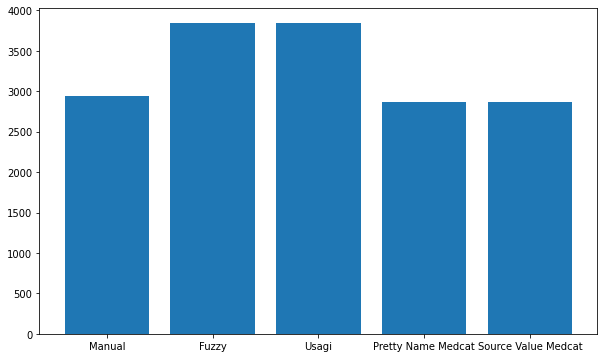

In [28]:
from matplotlib import pyplot as plt

# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=['Manual', 'Fuzzy', 'Usagi', 'Pretty Name Medcat', 'Source Value Medcat'],
    height=[mapped_counts_manual, mapped_counts_fuzzy, mapped_counts_usagi, mapped_counts_pretty_name_medcat, mapped_counts_source_value_medcat],
    # title='Title',
    # xlab
    )

#### Token Sort Ratio

In [29]:
from fuzzywuzzy import fuzz

def calculateTokenSortRatio(conceptName, mappedConceptName):
    if mappedConceptName:
        mappedConceptName = str(mappedConceptName)
        if len(mappedConceptName) > 0:
            return fuzz.token_sort_ratio(conceptName, mappedConceptName)
    return 0

/home/yram0006/phd/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [30]:
finalDf['Mapped Score Fuzzy'].sum()

248585

In [31]:
sum([calculateTokenSortRatio(row['concept_name'], row['Mapped Concept Fuzzy']) for _, row in finalDf.iterrows()])

248585

In [32]:
finalDf['Token Sort Ratio Manual'] = [calculateTokenSortRatio(row['concept_name'], row['concept_name_con']) for _, row in finalDf.iterrows()]
finalDf['Token Sort Ratio Fuzzy'] = [calculateTokenSortRatio(row['concept_name'], row['Mapped Concept Fuzzy']) for _, row in finalDf.iterrows()]
finalDf['Token Sort Ratio Usagi'] = [calculateTokenSortRatio(row['concept_name'], row['Mapped Concept Usagi']) for _, row in finalDf.iterrows()]
finalDf['Token Sort Ratio Pretty Name Medcat'] = [calculateTokenSortRatio(row['concept_name'], row['Mapped Concept Pretty Name Medcat']) for _, row in finalDf.iterrows()]
finalDf['Token Sort Ratio Source Value Medcat'] = [calculateTokenSortRatio(row['concept_name'], row['Mapped Concept Source Value Medcat']) for _, row in finalDf.iterrows()]

#### Total Token Sort Ratio

In [33]:
token_sort_ratio_manual = finalDf['Token Sort Ratio Manual'].sum()
token_sort_ratio_fuzzy = finalDf['Token Sort Ratio Fuzzy'].sum()
token_sort_ratio_usagi = finalDf['Token Sort Ratio Usagi'].sum()
token_sort_ratio_pretty_name_medcat = finalDf['Token Sort Ratio Pretty Name Medcat'].sum()
token_sort_source_value_medcat = finalDf['Token Sort Ratio Source Value Medcat'].sum()

print('Token Sort Ratio Manual: ', token_sort_ratio_manual)
print('Token Sort Ratio Fuzzy: ', token_sort_ratio_fuzzy)
print('Token Sort Ratio Usagi: ', token_sort_ratio_usagi)
print('Token Sort Ratio Pretty Name Medcat: ', token_sort_ratio_pretty_name_medcat)
print('Token Sort Ratio Source Value Medcat: ', token_sort_source_value_medcat)

Token Sort Ratio Manual:  236057
Token Sort Ratio Fuzzy:  248585
Token Sort Ratio Usagi:  331011
Token Sort Ratio Pretty Name Medcat:  150064
Token Sort Ratio Source Value Medcat:  165453


<BarContainer object of 5 artists>

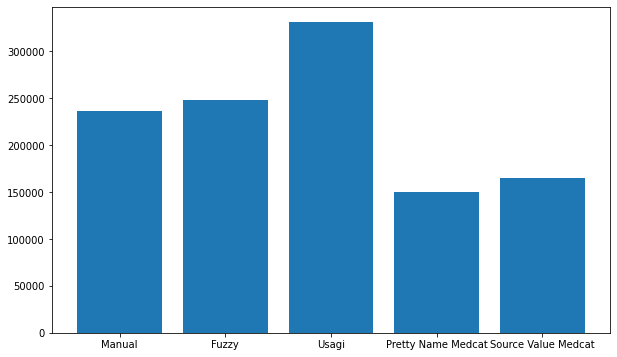

In [34]:
from matplotlib import pyplot as plt

# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=['Manual', 'Fuzzy', 'Usagi', 'Pretty Name Medcat', 'Source Value Medcat'],
    height=[token_sort_ratio_manual, token_sort_ratio_fuzzy, token_sort_ratio_usagi, token_sort_ratio_pretty_name_medcat, token_sort_source_value_medcat],
    # title='Title',
    # xlab
    )

#### Average Token Sort Ratio

In [35]:
avg_token_sort_ratio_manual = finalDf[finalDf['concept_name_con'].notna()]['Token Sort Ratio Manual'].sum()/finalDf[finalDf['concept_name_con'].notna()].shape[0]
avg_token_sort_ratio_fuzzy = finalDf[finalDf['Mapped Concept Fuzzy'].notna()]['Token Sort Ratio Fuzzy'].sum()/finalDf[finalDf['Mapped Concept Fuzzy'].notna()].shape[0]
avg_token_sort_ratio_usagi = finalDf[finalDf['Mapped Concept Usagi'].notna()]['Token Sort Ratio Usagi'].sum()/finalDf[finalDf['Mapped Concept Usagi'].notna()].shape[0]
avg_token_sort_ratio_pretty_name_medcat = finalDf[finalDf['Mapped Concept Pretty Name Medcat'].notna()]['Token Sort Ratio Pretty Name Medcat'].sum()/finalDf[finalDf['Mapped Concept Pretty Name Medcat'].notna()].shape[0]
avg_token_sort_source_value_medcat = finalDf[finalDf['Mapped Concept Source Value Medcat'].notna()]['Token Sort Ratio Source Value Medcat'].sum()/finalDf[finalDf['Mapped Concept Source Value Medcat'].notna()].shape[0]

print('Average Token Sort Ratio Manual: ', avg_token_sort_ratio_manual)
print('Average Token Sort Ratio Fuzzy: ', avg_token_sort_ratio_fuzzy)
print('Average Token Sort Ratio Usagi: ', avg_token_sort_ratio_usagi)
print('Average Token Sort Ratio Pretty Name Medcat: ', avg_token_sort_ratio_pretty_name_medcat)
print('Average Token Sort Ratio Source Value Medcat: ', avg_token_sort_source_value_medcat)

Average Token Sort Ratio Manual:  77.51086218601493
Average Token Sort Ratio Fuzzy:  64.7019781363873
Average Token Sort Ratio Usagi:  86.15590838105153
Average Token Sort Ratio Pretty Name Medcat:  52.250696378830085
Average Token Sort Ratio Source Value Medcat:  57.60898328690808


<BarContainer object of 5 artists>

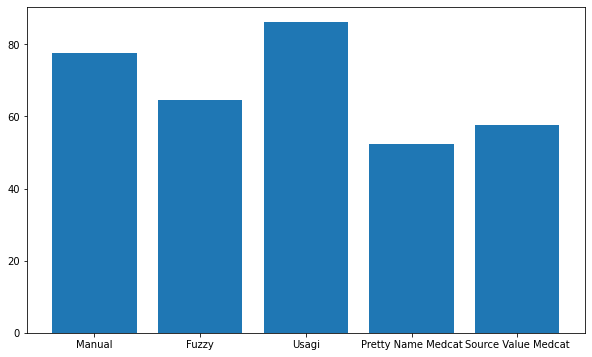

In [37]:
from matplotlib import pyplot as plt

# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=['Manual', 'Fuzzy', 'Usagi', 'Pretty Name Medcat', 'Source Value Medcat'],
    height=[avg_token_sort_ratio_manual, avg_token_sort_ratio_fuzzy, avg_token_sort_ratio_usagi, avg_token_sort_ratio_pretty_name_medcat, avg_token_sort_source_value_medcat],
    # title='Title',
    # xlab
    )

#### Category Wise Token Sort Ratio

In [38]:
dfs = []

valueColumns = ['Token Sort Ratio Manual', 'Token Sort Ratio Fuzzy', 'Token Sort Ratio Usagi', 'Token Sort Ratio Pretty Name Medcat', 'Token Sort Ratio Source Value Medcat']
conceptColumns = ['concept_name_con', 'Mapped Concept Fuzzy', 'Mapped Concept Usagi', 'Mapped Concept Pretty Name Medcat', 'Mapped Concept Source Value Medcat']
for valueColumn, conceptColumn in zip(valueColumns, conceptColumns):
    dfs.append(
        finalDf[finalDf[conceptColumn].notna()]\
            .groupby('source_vocabulary_id')\
                .agg({'concept_name': 'count', valueColumn: 'mean'})\
                    .sort_values('source_vocabulary_id')\
                        .reset_index()\
                            .rename(columns={'concept_name': valueColumn + ' Count', valueColumn: valueColumn + ' Average'})
    )

In [39]:
tokenSortRatioDf = pd.concat([dfs[0]['source_vocabulary_id'], dfs[0]['Token Sort Ratio Manual Count'], *[df.iloc[:, 2] for df in dfs]], axis=1)
tokenSortRatioDf.rename(columns={'Token Sort Ratio Manual Count': 'Count'}, inplace=True)
tokenSortRatioDf

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio Usagi Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,40.000000,65.800000,82.800000,57.250000,57.250000
1,mimiciv_drug_ndc,1400,97.872857,64.107143,98.442143,47.261768,55.555683
2,mimiciv_drug_route,96,32.833333,45.270833,64.583333,75.210526,89.526316
3,mimiciv_meas_chart,167,59.083832,63.911243,67.775148,66.409836,69.147541
4,mimiciv_meas_chartevents_value,29,73.689655,69.103448,75.482759,70.538462,81.307692
5,mimiciv_meas_lab_loinc,251,48.382470,63.330677,57.015936,45.379808,46.317308
6,mimiciv_meas_unit,54,41.222222,42.981481,43.703704,39.272727,95.818182
7,mimiciv_meas_wf,44,82.340909,57.250000,79.795455,49.305556,45.944444
8,mimiciv_meas_wf_unit,3,77.333333,60.666667,85.666667,89.333333,94.000000
9,mimiciv_micro_antibiotic,29,37.586207,68.551724,97.413793,84.400000,92.400000


##### Category Wise Token Sort Ratio For Medcat

In [40]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio Source Value Medcat Average']>70]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio Usagi Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
2,mimiciv_drug_route,96,32.833333,45.270833,64.583333,75.210526,89.526316
4,mimiciv_meas_chartevents_value,29,73.689655,69.103448,75.482759,70.538462,81.307692
6,mimiciv_meas_unit,54,41.222222,42.981481,43.703704,39.272727,95.818182
8,mimiciv_meas_wf_unit,3,77.333333,60.666667,85.666667,89.333333,94.000000
9,mimiciv_micro_antibiotic,29,37.586207,68.551724,97.413793,84.400000,92.400000
10,mimiciv_micro_microtest,34,65.676471,65.411765,72.176471,63.050000,74.050000
11,mimiciv_micro_organism,364,82.945055,75.013736,85.813187,78.377465,88.549296
12,mimiciv_micro_resistance,4,100.000000,64.500000,100.000000,100.000000,100.000000
13,mimiciv_micro_specimen,85,57.588235,61.494118,74.694118,58.925926,76.444444
16,mimiciv_obs_insurance,5,53.800000,55.800000,84.000000,85.833333,89.666667


In [41]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio Source Value Medcat Average']>tokenSortRatioDf['Token Sort Ratio Manual Average']]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio Usagi Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,40.000000,65.800000,82.800000,57.250000,57.250000
2,mimiciv_drug_route,96,32.833333,45.270833,64.583333,75.210526,89.526316
3,mimiciv_meas_chart,167,59.083832,63.911243,67.775148,66.409836,69.147541
4,mimiciv_meas_chartevents_value,29,73.689655,69.103448,75.482759,70.538462,81.307692
6,mimiciv_meas_unit,54,41.222222,42.981481,43.703704,39.272727,95.818182
8,mimiciv_meas_wf_unit,3,77.333333,60.666667,85.666667,89.333333,94.000000
9,mimiciv_micro_antibiotic,29,37.586207,68.551724,97.413793,84.400000,92.400000
10,mimiciv_micro_microtest,34,65.676471,65.411765,72.176471,63.050000,74.050000
11,mimiciv_micro_organism,364,82.945055,75.013736,85.813187,78.377465,88.549296
13,mimiciv_micro_specimen,85,57.588235,61.494118,74.694118,58.925926,76.444444


In [42]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio Source Value Medcat Average']>tokenSortRatioDf['Token Sort Ratio Fuzzy Average']]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio Usagi Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
2,mimiciv_drug_route,96,32.833333,45.270833,64.583333,75.210526,89.526316
3,mimiciv_meas_chart,167,59.083832,63.911243,67.775148,66.409836,69.147541
4,mimiciv_meas_chartevents_value,29,73.689655,69.103448,75.482759,70.538462,81.307692
6,mimiciv_meas_unit,54,41.222222,42.981481,43.703704,39.272727,95.818182
8,mimiciv_meas_wf_unit,3,77.333333,60.666667,85.666667,89.333333,94.000000
9,mimiciv_micro_antibiotic,29,37.586207,68.551724,97.413793,84.400000,92.400000
10,mimiciv_micro_microtest,34,65.676471,65.411765,72.176471,63.050000,74.050000
11,mimiciv_micro_organism,364,82.945055,75.013736,85.813187,78.377465,88.549296
12,mimiciv_micro_resistance,4,100.000000,64.500000,100.000000,100.000000,100.000000
13,mimiciv_micro_specimen,85,57.588235,61.494118,74.694118,58.925926,76.444444


In [43]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio Source Value Medcat Average']>tokenSortRatioDf['Token Sort Ratio Usagi Average']]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio Usagi Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
2,mimiciv_drug_route,96,32.833333,45.270833,64.583333,75.210526,89.526316
3,mimiciv_meas_chart,167,59.083832,63.911243,67.775148,66.409836,69.147541
4,mimiciv_meas_chartevents_value,29,73.689655,69.103448,75.482759,70.538462,81.307692
6,mimiciv_meas_unit,54,41.222222,42.981481,43.703704,39.272727,95.818182
8,mimiciv_meas_wf_unit,3,77.333333,60.666667,85.666667,89.333333,94.000000
10,mimiciv_micro_microtest,34,65.676471,65.411765,72.176471,63.050000,74.050000
11,mimiciv_micro_organism,364,82.945055,75.013736,85.813187,78.377465,88.549296
13,mimiciv_micro_specimen,85,57.588235,61.494118,74.694118,58.925926,76.444444
14,mimiciv_mimic_generated,12,29.250000,65.416667,64.000000,68.000000,66.714286
16,mimiciv_obs_insurance,5,53.800000,55.800000,84.000000,85.833333,89.666667


##### Category Wise Token Sort Ratio For Fuzzy

In [44]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio Fuzzy Average']>70]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio Usagi Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
11,mimiciv_micro_organism,364,82.945055,75.013736,85.813187,78.377465,88.549296


In [45]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio Fuzzy Average']>tokenSortRatioDf['Token Sort Ratio Manual Average']]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio Usagi Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,40.000000,65.800000,82.800000,57.250000,57.250000
2,mimiciv_drug_route,96,32.833333,45.270833,64.583333,75.210526,89.526316
3,mimiciv_meas_chart,167,59.083832,63.911243,67.775148,66.409836,69.147541
5,mimiciv_meas_lab_loinc,251,48.382470,63.330677,57.015936,45.379808,46.317308
6,mimiciv_meas_unit,54,41.222222,42.981481,43.703704,39.272727,95.818182
9,mimiciv_micro_antibiotic,29,37.586207,68.551724,97.413793,84.400000,92.400000
13,mimiciv_micro_specimen,85,57.588235,61.494118,74.694118,58.925926,76.444444
14,mimiciv_mimic_generated,12,29.250000,65.416667,64.000000,68.000000,66.714286
16,mimiciv_obs_insurance,5,53.800000,55.800000,84.000000,85.833333,89.666667
20,mimiciv_proc_datetimeevents,129,38.217054,63.992248,58.534884,65.735294,67.029412


In [47]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio Fuzzy Average']>tokenSortRatioDf['Token Sort Ratio Source Value Medcat Average']]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio Usagi Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,40.000000,65.800000,82.800000,57.250000,57.250000
1,mimiciv_drug_ndc,1400,97.872857,64.107143,98.442143,47.261768,55.555683
5,mimiciv_meas_lab_loinc,251,48.382470,63.330677,57.015936,45.379808,46.317308
7,mimiciv_meas_wf,44,82.340909,57.250000,79.795455,49.305556,45.944444
15,mimiciv_obs_drgcodes,22,93.954545,66.455240,92.279476,42.676090,42.903416
18,mimiciv_obs_marital,7,77.857143,62.857143,91.142857,48.715596,47.440367
23,mimiciv_vis_admission_type,9,48.333333,61.222222,85.111111,28.200000,31.900000


In [48]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio Fuzzy Average']>tokenSortRatioDf['Token Sort Ratio Usagi Average']]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio Usagi Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
5,mimiciv_meas_lab_loinc,251,48.382470,63.330677,57.015936,45.379808,46.317308
14,mimiciv_mimic_generated,12,29.250000,65.416667,64.000000,68.000000,66.714286
20,mimiciv_proc_datetimeevents,129,38.217054,63.992248,58.534884,65.735294,67.029412


##### Category Wise Token Sort Ratio For Usagi

In [49]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio Usagi Average']>70]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio Usagi Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,40.000000,65.800000,82.800000,57.250000,57.250000
1,mimiciv_drug_ndc,1400,97.872857,64.107143,98.442143,47.261768,55.555683
4,mimiciv_meas_chartevents_value,29,73.689655,69.103448,75.482759,70.538462,81.307692
7,mimiciv_meas_wf,44,82.340909,57.250000,79.795455,49.305556,45.944444
8,mimiciv_meas_wf_unit,3,77.333333,60.666667,85.666667,89.333333,94.000000
9,mimiciv_micro_antibiotic,29,37.586207,68.551724,97.413793,84.400000,92.400000
10,mimiciv_micro_microtest,34,65.676471,65.411765,72.176471,63.050000,74.050000
11,mimiciv_micro_organism,364,82.945055,75.013736,85.813187,78.377465,88.549296
12,mimiciv_micro_resistance,4,100.000000,64.500000,100.000000,100.000000,100.000000
13,mimiciv_micro_specimen,85,57.588235,61.494118,74.694118,58.925926,76.444444


In [50]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio Usagi Average']>tokenSortRatioDf['Token Sort Ratio Manual Average']]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio Usagi Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,40.000000,65.800000,82.800000,57.250000,57.250000
1,mimiciv_drug_ndc,1400,97.872857,64.107143,98.442143,47.261768,55.555683
2,mimiciv_drug_route,96,32.833333,45.270833,64.583333,75.210526,89.526316
3,mimiciv_meas_chart,167,59.083832,63.911243,67.775148,66.409836,69.147541
4,mimiciv_meas_chartevents_value,29,73.689655,69.103448,75.482759,70.538462,81.307692
5,mimiciv_meas_lab_loinc,251,48.382470,63.330677,57.015936,45.379808,46.317308
6,mimiciv_meas_unit,54,41.222222,42.981481,43.703704,39.272727,95.818182
8,mimiciv_meas_wf_unit,3,77.333333,60.666667,85.666667,89.333333,94.000000
9,mimiciv_micro_antibiotic,29,37.586207,68.551724,97.413793,84.400000,92.400000
10,mimiciv_micro_microtest,34,65.676471,65.411765,72.176471,63.050000,74.050000


In [51]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio Usagi Average']>tokenSortRatioDf['Token Sort Ratio Fuzzy Average']]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio Usagi Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,40.000000,65.800000,82.800000,57.250000,57.250000
1,mimiciv_drug_ndc,1400,97.872857,64.107143,98.442143,47.261768,55.555683
2,mimiciv_drug_route,96,32.833333,45.270833,64.583333,75.210526,89.526316
3,mimiciv_meas_chart,167,59.083832,63.911243,67.775148,66.409836,69.147541
4,mimiciv_meas_chartevents_value,29,73.689655,69.103448,75.482759,70.538462,81.307692
6,mimiciv_meas_unit,54,41.222222,42.981481,43.703704,39.272727,95.818182
7,mimiciv_meas_wf,44,82.340909,57.250000,79.795455,49.305556,45.944444
8,mimiciv_meas_wf_unit,3,77.333333,60.666667,85.666667,89.333333,94.000000
9,mimiciv_micro_antibiotic,29,37.586207,68.551724,97.413793,84.400000,92.400000
10,mimiciv_micro_microtest,34,65.676471,65.411765,72.176471,63.050000,74.050000


In [52]:
tokenSortRatioDf[tokenSortRatioDf['Token Sort Ratio Usagi Average']>tokenSortRatioDf['Token Sort Ratio Source Value Medcat Average']]

,source_vocabulary_id,Count,Token Sort Ratio Manual Average,Token Sort Ratio Fuzzy Average,Token Sort Ratio Usagi Average,Token Sort Ratio Pretty Name Medcat Average,Token Sort Ratio Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,40.000000,65.800000,82.800000,57.250000,57.250000
1,mimiciv_drug_ndc,1400,97.872857,64.107143,98.442143,47.261768,55.555683
5,mimiciv_meas_lab_loinc,251,48.382470,63.330677,57.015936,45.379808,46.317308
7,mimiciv_meas_wf,44,82.340909,57.250000,79.795455,49.305556,45.944444
9,mimiciv_micro_antibiotic,29,37.586207,68.551724,97.413793,84.400000,92.400000
15,mimiciv_obs_drgcodes,22,93.954545,66.455240,92.279476,42.676090,42.903416
17,mimiciv_obs_language,1,61.000000,52.000000,100.000000,68.600000,68.600000
18,mimiciv_obs_marital,7,77.857143,62.857143,91.142857,48.715596,47.440367
19,mimiciv_per_ethnicity,8,71.000000,60.625000,96.500000,62.617978,71.977528
21,mimiciv_proc_itemid,113,51.115044,63.327434,72.699115,67.666667,71.500000


### Using `Semantic Similarity` (based on `Phrase Embeddings`)

In [53]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('pritamdeka/S-BioBert-snli-multinli-stsb')

def calculateSemanticSimilarity(conceptName, mappedConceptName):
    if mappedConceptName:
        mappedConceptName = str(mappedConceptName)
        if len(mappedConceptName) > 0:
            conceptNameEmbedding = model.encode(conceptName, convert_to_tensor=True)
            mappedConceptNameEmbedding = model.encode(mappedConceptName, convert_to_tensor=True)
            similarityScore = util.pytorch_cos_sim(conceptNameEmbedding, mappedConceptNameEmbedding)
            return similarityScore
    return 0


/home/yram0006/phd/chapter_1/workspace/EHRQC/notebooks/.venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [54]:
finalDf['Semantic Similarity Manual'] = [calculateSemanticSimilarity(row['concept_name'], row['concept_name_con']) for _, row in finalDf.iterrows()]
finalDf['Semantic Similarity Fuzzy'] = [calculateSemanticSimilarity(row['concept_name'], row['Mapped Concept Fuzzy']) for _, row in finalDf.iterrows()]
finalDf['Semantic Similarity Usagi'] = [calculateSemanticSimilarity(row['concept_name'], row['Mapped Concept Usagi']) for _, row in finalDf.iterrows()]
finalDf['Semantic Similarity Pretty Name Medcat'] = [calculateSemanticSimilarity(row['concept_name'], row['Mapped Concept Pretty Name Medcat']) for _, row in finalDf.iterrows()]
finalDf['Semantic Similarity Source Value Medcat'] = [calculateSemanticSimilarity(row['concept_name'], row['Mapped Concept Source Value Medcat']) for _, row in finalDf.iterrows()]

#### Total Semantic Similarity

In [55]:
semantic_similarity_manual = finalDf['Semantic Similarity Manual'].sum()[0][0].item()
semantic_similarity_fuzzy = finalDf['Semantic Similarity Fuzzy'].sum()[0][0].item()
semantic_similarity_usagi = finalDf['Semantic Similarity Usagi'].sum()[0][0].item()
semantic_similarity_pretty_name_medcat = finalDf['Semantic Similarity Pretty Name Medcat'].sum()[0][0].item()
semantic_similarity_source_value_medcat = finalDf['Semantic Similarity Source Value Medcat'].sum()[0][0].item()

print('Semantic Similarity Manual: ', semantic_similarity_manual)
print('Semantic Similarity Fuzzy: ', semantic_similarity_fuzzy)
print('Semantic Similarity Usagi: ', semantic_similarity_usagi)
print('Semantic Similarity Pretty Name Medcat: ', semantic_similarity_pretty_name_medcat)
print('Semantic Similarity Source Value Medcat: ', semantic_similarity_source_value_medcat)

Semantic Similarity Manual:  2129.58056640625
Semantic Similarity Fuzzy:  1697.3245849609375
Semantic Similarity Usagi:  2534.423583984375
Semantic Similarity Pretty Name Medcat:  1199.1961669921875
Semantic Similarity Source Value Medcat:  1834.468505859375


<BarContainer object of 5 artists>

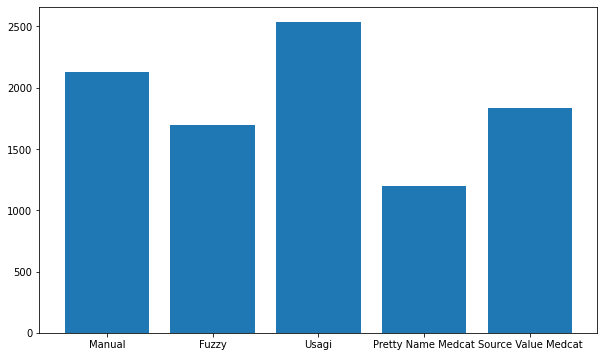

In [56]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=['Manual', 'Fuzzy', 'Usagi', 'Pretty Name Medcat', 'Source Value Medcat'],
    height=[semantic_similarity_manual, semantic_similarity_fuzzy, semantic_similarity_usagi, semantic_similarity_pretty_name_medcat, semantic_similarity_source_value_medcat],
    )

#### Average Semantic Similarity

In [57]:
avg_semantic_similarity_manual = finalDf[finalDf['concept_name_con'].notna()]['Semantic Similarity Manual'].sum()[0][0].item()/finalDf[finalDf['concept_name_con'].notna()].shape[0]
avg_semantic_similarity_fuzzy = finalDf[finalDf['Mapped Concept Fuzzy'].notna()]['Semantic Similarity Fuzzy'].sum()[0][0].item()/finalDf[finalDf['Mapped Concept Fuzzy'].notna()].shape[0]
avg_semantic_similarity_usagi = finalDf[finalDf['Mapped Concept Usagi'].notna()]['Semantic Similarity Usagi'].sum()[0][0].item()/finalDf[finalDf['Mapped Concept Usagi'].notna()].shape[0]
avg_semantic_similarity_pretty_name_medcat = finalDf[finalDf['Mapped Concept Pretty Name Medcat'].notna()]['Semantic Similarity Pretty Name Medcat'].sum()[0][0].item()/finalDf[finalDf['Mapped Concept Pretty Name Medcat'].notna()].shape[0]
avg_semantic_similarity_source_value_medcat = finalDf[finalDf['Mapped Concept Source Value Medcat'].notna()]['Semantic Similarity Source Value Medcat'].sum()[0][0].item()/finalDf[finalDf['Mapped Concept Source Value Medcat'].notna()].shape[0]

print('Average Semantic Similarity Manual: ', avg_semantic_similarity_manual)
print('Average Semantic Similarity Fuzzy: ', avg_semantic_similarity_fuzzy)
print('Average Semantic Similarity Usagi: ', avg_semantic_similarity_usagi)
print('Average Semantic Similarity Pretty Name Medcat: ', avg_semantic_similarity_pretty_name_medcat)
print('Average Semantic Similarity Source Value Medcat: ', avg_semantic_similarity_source_value_medcat)

Average Semantic Similarity Manual:  0.7091162241970044
Average Semantic Similarity Fuzzy:  0.4417815161272612
Average Semantic Similarity Usagi:  0.659662567408739
Average Semantic Similarity Pretty Name Medcat:  0.41754741190535777
Average Semantic Similarity Source Value Medcat:  0.638742515967749


<BarContainer object of 5 artists>

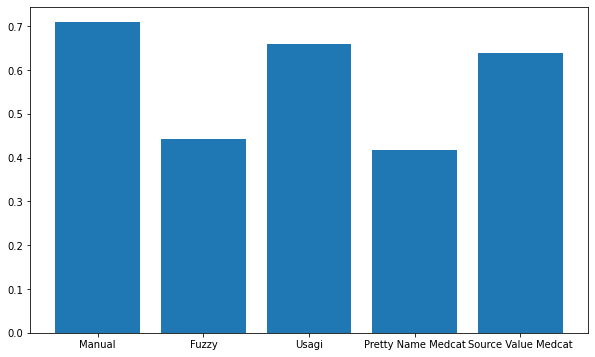

In [58]:
from matplotlib import pyplot as plt

# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=['Manual', 'Fuzzy', 'Usagi', 'Pretty Name Medcat', 'Source Value Medcat'],
    height=[avg_semantic_similarity_manual, avg_semantic_similarity_fuzzy, avg_semantic_similarity_usagi, avg_semantic_similarity_pretty_name_medcat, avg_semantic_similarity_source_value_medcat],
    )

#### Category Wise Semantic Similarity

In [59]:
dfs_1 = []

valueColumns = ['Semantic Similarity Manual', 'Semantic Similarity Fuzzy', 'Semantic Similarity Usagi', 'Semantic Similarity Pretty Name Medcat', 'Semantic Similarity Source Value Medcat']
conceptColumns = ['concept_name_con', 'Mapped Concept Fuzzy', 'Mapped Concept Usagi', 'Mapped Concept Pretty Name Medcat', 'Mapped Concept Source Value Medcat']
for valueColumn, conceptColumn in zip(valueColumns, conceptColumns):
    dfs_1.append(
        finalDf[finalDf[conceptColumn].notna()]\
            .groupby('source_vocabulary_id')\
                .agg({'concept_name': 'count', valueColumn: 'mean'})\
                    .sort_values('source_vocabulary_id')\
                        .reset_index()\
                            .rename(columns={'concept_name': valueColumn + ' Count', valueColumn: valueColumn + ' Average'})
    )

In [60]:
semanticSimilarityDf = pd.concat([dfs_1[0]['source_vocabulary_id'], dfs_1[0]['Semantic Similarity Manual Count'], *[df.iloc[:, 2] for df in dfs_1]], axis=1)
semanticSimilarityDf.rename(columns={'Semantic Similarity Manual Count': 'Count'}, inplace=True)
semanticSimilarityDf

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity Usagi Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,0.511933,0.440206,0.843793,0.664553,0.664553
1,mimiciv_drug_ndc,1400,0.939480,0.618476,0.940383,0.484508,0.570378
2,mimiciv_drug_route,96,0.334011,0.241432,0.442050,0.437547,0.872742
3,mimiciv_meas_chart,167,0.670031,0.439099,0.647381,0.650445,0.701415
4,mimiciv_meas_chartevents_value,29,0.721108,0.656029,0.699368,0.628679,0.781497
5,mimiciv_meas_lab_loinc,251,0.617718,0.489650,0.605107,0.561406,0.601407
6,mimiciv_meas_unit,54,0.547541,0.260350,0.433175,0.508834,0.962164
7,mimiciv_meas_wf,44,0.888265,0.305915,0.849290,0.494435,0.540829
8,mimiciv_meas_wf_unit,3,0.885513,0.313381,0.758702,0.851199,0.979737
9,mimiciv_micro_antibiotic,29,0.247720,0.465462,0.391124,0.400129,0.921752


##### Category Wise Token Sort Ratio For Medcat

In [61]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity Source Value Medcat Average']>0.8]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity Usagi Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
2,mimiciv_drug_route,96,0.334011,0.241432,0.442050,0.437547,0.872742
6,mimiciv_meas_unit,54,0.547541,0.260350,0.433175,0.508834,0.962164
8,mimiciv_meas_wf_unit,3,0.885513,0.313381,0.758702,0.851199,0.979737
9,mimiciv_micro_antibiotic,29,0.247720,0.465462,0.391124,0.400129,0.921752
11,mimiciv_micro_organism,364,0.415814,0.399316,0.413371,0.397774,0.900952
12,mimiciv_micro_resistance,4,1.000000,0.374386,1.000000,1.000000,1.000000
13,mimiciv_micro_specimen,85,0.348448,0.316497,0.374483,0.368740,0.837022
16,mimiciv_obs_insurance,5,0.679697,0.233933,0.810751,0.252278,0.933784
22,mimiciv_vis_admission_location,43,0.602849,0.493173,0.661231,0.280524,0.843868


In [62]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity Source Value Medcat Average']>semanticSimilarityDf['Semantic Similarity Manual Average']]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity Usagi Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,0.511933,0.440206,0.843793,0.664553,0.664553
2,mimiciv_drug_route,96,0.334011,0.241432,0.442050,0.437547,0.872742
3,mimiciv_meas_chart,167,0.670031,0.439099,0.647381,0.650445,0.701415
4,mimiciv_meas_chartevents_value,29,0.721108,0.656029,0.699368,0.628679,0.781497
6,mimiciv_meas_unit,54,0.547541,0.260350,0.433175,0.508834,0.962164
8,mimiciv_meas_wf_unit,3,0.885513,0.313381,0.758702,0.851199,0.979737
9,mimiciv_micro_antibiotic,29,0.247720,0.465462,0.391124,0.400129,0.921752
10,mimiciv_micro_microtest,34,0.410432,0.335759,0.409503,0.450411,0.796733
11,mimiciv_micro_organism,364,0.415814,0.399316,0.413371,0.397774,0.900952
13,mimiciv_micro_specimen,85,0.348448,0.316497,0.374483,0.368740,0.837022


In [63]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity Source Value Medcat Average']>semanticSimilarityDf['Semantic Similarity Fuzzy Average']]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity Usagi Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,0.511933,0.440206,0.843793,0.664553,0.664553
2,mimiciv_drug_route,96,0.334011,0.241432,0.442050,0.437547,0.872742
3,mimiciv_meas_chart,167,0.670031,0.439099,0.647381,0.650445,0.701415
4,mimiciv_meas_chartevents_value,29,0.721108,0.656029,0.699368,0.628679,0.781497
5,mimiciv_meas_lab_loinc,251,0.617718,0.489650,0.605107,0.561406,0.601407
6,mimiciv_meas_unit,54,0.547541,0.260350,0.433175,0.508834,0.962164
7,mimiciv_meas_wf,44,0.888265,0.305915,0.849290,0.494435,0.540829
8,mimiciv_meas_wf_unit,3,0.885513,0.313381,0.758702,0.851199,0.979737
9,mimiciv_micro_antibiotic,29,0.247720,0.465462,0.391124,0.400129,0.921752
10,mimiciv_micro_microtest,34,0.410432,0.335759,0.409503,0.450411,0.796733


In [64]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity Source Value Medcat Average']>semanticSimilarityDf['Semantic Similarity Usagi Average']]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity Usagi Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
2,mimiciv_drug_route,96,0.334011,0.241432,0.442050,0.437547,0.872742
3,mimiciv_meas_chart,167,0.670031,0.439099,0.647381,0.650445,0.701415
4,mimiciv_meas_chartevents_value,29,0.721108,0.656029,0.699368,0.628679,0.781497
6,mimiciv_meas_unit,54,0.547541,0.260350,0.433175,0.508834,0.962164
8,mimiciv_meas_wf_unit,3,0.885513,0.313381,0.758702,0.851199,0.979737
9,mimiciv_micro_antibiotic,29,0.247720,0.465462,0.391124,0.400129,0.921752
10,mimiciv_micro_microtest,34,0.410432,0.335759,0.409503,0.450411,0.796733
11,mimiciv_micro_organism,364,0.415814,0.399316,0.413371,0.397774,0.900952
13,mimiciv_micro_specimen,85,0.348448,0.316497,0.374483,0.368740,0.837022
14,mimiciv_mimic_generated,12,0.074238,0.366378,0.595049,0.695994,0.719693


##### Category Wise Token Sort Ratio For Fuzzy

In [65]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity Fuzzy Average']>0.5]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity Usagi Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
1,mimiciv_drug_ndc,1400,0.939480,0.618476,0.940383,0.484508,0.570378
4,mimiciv_meas_chartevents_value,29,0.721108,0.656029,0.699368,0.628679,0.781497


In [66]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity Fuzzy Average']>semanticSimilarityDf['Semantic Similarity Manual Average']]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity Usagi Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
9,mimiciv_micro_antibiotic,29,0.247720,0.465462,0.391124,0.400129,0.921752
14,mimiciv_mimic_generated,12,0.074238,0.366378,0.595049,0.695994,0.719693
18,mimiciv_obs_marital,7,0.213379,0.262700,0.268332,0.469481,0.538425
20,mimiciv_proc_datetimeevents,129,0.301727,0.355146,0.472742,0.594528,0.705319
24,mimiciv_vis_discharge_location,13,0.246134,0.264549,0.242449,NaN,NaN


In [67]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity Fuzzy Average']>semanticSimilarityDf['Semantic Similarity Usagi Average']]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity Usagi Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
9,mimiciv_micro_antibiotic,29,0.247720,0.465462,0.391124,0.400129,0.921752
17,mimiciv_obs_language,1,0.252213,0.247790,0.218943,0.223513,0.725351
24,mimiciv_vis_discharge_location,13,0.246134,0.264549,0.242449,NaN,NaN


In [68]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity Fuzzy Average']>semanticSimilarityDf['Semantic Similarity Source Value Medcat Average']]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity Usagi Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
1,mimiciv_drug_ndc,1400,0.93948,0.618476,0.940383,0.484508,0.570378


##### Category Wise Token Sort Ratio For Usagi

In [69]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity Usagi Average']>0.8]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity Usagi Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,0.511933,0.440206,0.843793,0.664553,0.664553
1,mimiciv_drug_ndc,1400,0.939480,0.618476,0.940383,0.484508,0.570378
7,mimiciv_meas_wf,44,0.888265,0.305915,0.849290,0.494435,0.540829
12,mimiciv_micro_resistance,4,1.000000,0.374386,1.000000,1.000000,1.000000
16,mimiciv_obs_insurance,5,0.679697,0.233933,0.810751,0.252278,0.933784


In [70]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity Usagi Average']>semanticSimilarityDf['Semantic Similarity Manual Average']]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity Usagi Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,0.511933,0.440206,0.843793,0.664553,0.664553
1,mimiciv_drug_ndc,1400,0.939480,0.618476,0.940383,0.484508,0.570378
2,mimiciv_drug_route,96,0.334011,0.241432,0.442050,0.437547,0.872742
9,mimiciv_micro_antibiotic,29,0.247720,0.465462,0.391124,0.400129,0.921752
13,mimiciv_micro_specimen,85,0.348448,0.316497,0.374483,0.368740,0.837022
14,mimiciv_mimic_generated,12,0.074238,0.366378,0.595049,0.695994,0.719693
16,mimiciv_obs_insurance,5,0.679697,0.233933,0.810751,0.252278,0.933784
18,mimiciv_obs_marital,7,0.213379,0.262700,0.268332,0.469481,0.538425
19,mimiciv_per_ethnicity,8,0.270955,0.252993,0.329929,0.650257,0.745932
20,mimiciv_proc_datetimeevents,129,0.301727,0.355146,0.472742,0.594528,0.705319


In [71]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity Usagi Average']>semanticSimilarityDf['Semantic Similarity Fuzzy Average']]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity Usagi Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,0.511933,0.440206,0.843793,0.664553,0.664553
1,mimiciv_drug_ndc,1400,0.939480,0.618476,0.940383,0.484508,0.570378
2,mimiciv_drug_route,96,0.334011,0.241432,0.442050,0.437547,0.872742
3,mimiciv_meas_chart,167,0.670031,0.439099,0.647381,0.650445,0.701415
4,mimiciv_meas_chartevents_value,29,0.721108,0.656029,0.699368,0.628679,0.781497
5,mimiciv_meas_lab_loinc,251,0.617718,0.489650,0.605107,0.561406,0.601407
6,mimiciv_meas_unit,54,0.547541,0.260350,0.433175,0.508834,0.962164
7,mimiciv_meas_wf,44,0.888265,0.305915,0.849290,0.494435,0.540829
8,mimiciv_meas_wf_unit,3,0.885513,0.313381,0.758702,0.851199,0.979737
10,mimiciv_micro_microtest,34,0.410432,0.335759,0.409503,0.450411,0.796733


In [72]:
semanticSimilarityDf[semanticSimilarityDf['Semantic Similarity Usagi Average']>semanticSimilarityDf['Semantic Similarity Source Value Medcat Average']]

,source_vocabulary_id,Count,Semantic Similarity Manual Average,Semantic Similarity Fuzzy Average,Semantic Similarity Usagi Average,Semantic Similarity Pretty Name Medcat Average,Semantic Similarity Source Value Medcat Average
0,mimiciv_cs_place_of_service,5,0.511933,0.440206,0.843793,0.664553,0.664553
1,mimiciv_drug_ndc,1400,0.939480,0.618476,0.940383,0.484508,0.570378
5,mimiciv_meas_lab_loinc,251,0.617718,0.489650,0.605107,0.561406,0.601407
7,mimiciv_meas_wf,44,0.888265,0.305915,0.849290,0.494435,0.540829
